In [1]:
!ls -l

total 384
-rw-r--r--  1 samlewallen  staff  98021 Jun 21 23:31 mnist-modded-by-sam.ipynb
-rw-r--r--@ 1 samlewallen  staff  96717 Jun 21 19:48 mnist.ipynb


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

In [3]:
#load labels

with open('train-labels-idx1-ubyte', 'rb') as f:
    label_bytes = f.read()
label_bytes = label_bytes[8:]
print(len(label_bytes))
labels = np.frombuffer(label_bytes, dtype='B')
labels = labels.astype('i4')

FileNotFoundError: [Errno 2] No such file or directory: 'train-labels-idx1-ubyte'

In [4]:
# load images
with open('train-images-idx3-ubyte', 'rb') as f:
    image_bytes = f.read()
image_bytes = image_bytes[16:]
print(len(image_bytes))
images = np.frombuffer(image_bytes, dtype='B')
images = images.astype('f4')
images = images.reshape((28, 28, 60000), order='F')
images = images.swapaxes(0, 1)
images = images / 255.0

print(images.shape)

FileNotFoundError: [Errno 2] No such file or directory: 'train-images-idx3-ubyte'

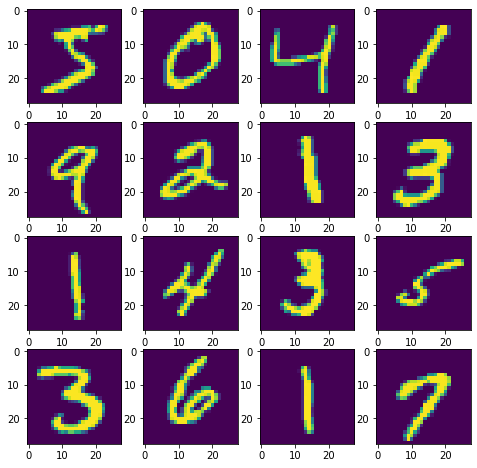

[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7]


In [5]:
# display some digits and their labels
fig = plt.figure(figsize=(8, 8))

for i in range(16):
    fig.add_subplot(4, 4, i + 1)
    plt.imshow(images[:, :, i])
plt.show()

print(labels[:16])

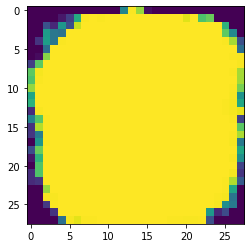

In [6]:
# display the max value for each pixel
# as just curious about the behavior around the edge
plt.imshow(np.max(images, axis=2))

In [7]:
# compute the correlation metric on the measurement space (pixels)
images_flat = images.reshape((28 * 28, 60000))

corr = np.corrcoef(images_flat)
corr = corr.reshape((28, 28, 28, 28))

/home/cotton/opt/Python-3.7.7/lib/python3.7/site-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/cotton/opt/Python-3.7.7/lib/python3.7/site-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


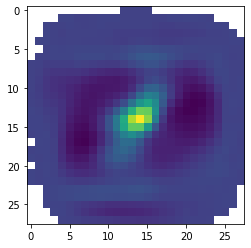

In [8]:
# correlation heat map of the center point
plt.imshow(corr[:, :, 14, 14])

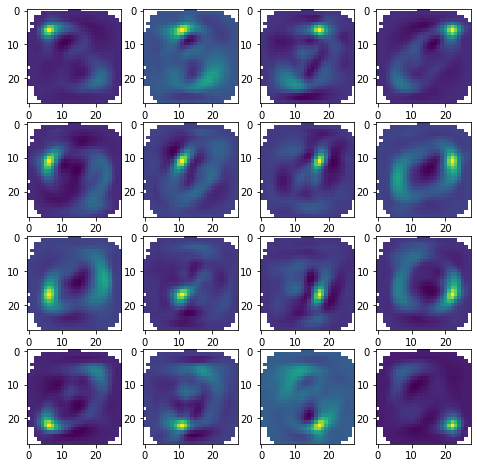

[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7]


In [9]:
# correlation of various points on a grad
ds = [6, 11, 17, 22]

fig = plt.figure(figsize=(8, 8))

for i in range(4):
    for j in range(4):
        fig.add_subplot(4, 4, j + 4 * i + 1)
        plt.imshow(corr[:, :, ds[i], ds[j]])
plt.show()

print(labels[:16])